In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("insurance.csv")

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
data.shape

(1338, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Check the feature correlations

<AxesSubplot:>

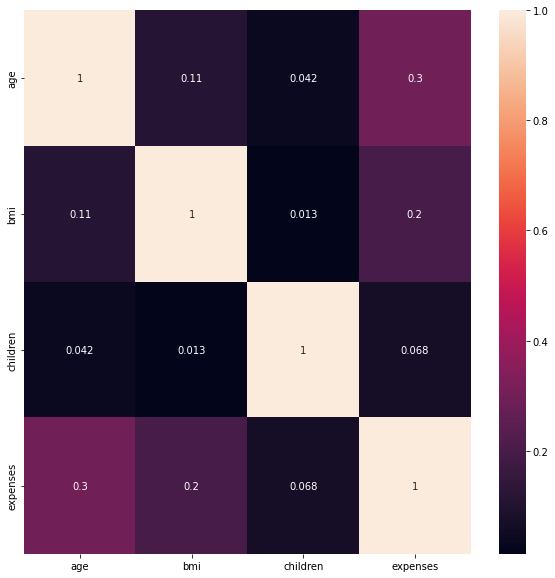

In [7]:
fig, ax = plt.subplots(figsize=(10,10))

corr = data.corr()
sns.heatmap(corr, annot = True, ax = ax)

In [9]:
d_types = dict(data.dtypes)
for name, type_ in d_types.items():
    if str(type_) == 'object':
        print(f"<============= {name} ==========>")
        print(data[name].value_counts())
        print()

<============= sex ==========>
male      676
female    662
Name: sex, dtype: int64

<============= smoker ==========>
no     1064
yes     274
Name: smoker, dtype: int64

<============= region ==========>
southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64



In [10]:
from sklearn.preprocessing import LabelEncoder

for name, type_ in d_types.items():
    if str(type_) == 'object':
        Le = LabelEncoder()
        data[name] = Le.fit_transform(data[name])

Check info after Label Encoding

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   int32  
 6   expenses  1338 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 57.6 KB


One Hot Encoding

In [12]:
from sklearn.preprocessing import OneHotEncoder

onehotencoder = OneHotEncoder()
part = onehotencoder.fit_transform(data['region'].values.reshape(-1,1)).toarray()

values = dict(data["region"].value_counts())

for e, (val, _) in enumerate(values.items()):
    data["region_" + str(val)] = part[:,e]
    
data = data.drop(["region"], axis = 1)

data.head()

,age,sex,bmi,children,smoker,expenses,region_2,region_3,region_1,region_0
0,19,0,27.9,0,1,16884.92,0.0,0.0,0.0,1.0
1,18,1,33.8,1,0,1725.55,0.0,0.0,1.0,0.0
2,28,1,33.0,3,0,4449.46,0.0,0.0,1.0,0.0
3,33,1,22.7,0,0,21984.47,0.0,1.0,0.0,0.0
4,32,1,28.9,0,0,3866.86,0.0,1.0,0.0,0.0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   expenses  1338 non-null   float64
 6   region_2  1338 non-null   float64
 7   region_3  1338 non-null   float64
 8   region_1  1338 non-null   float64
 9   region_0  1338 non-null   float64
dtypes: float64(6), int32(2), int64(2)
memory usage: 94.2 KB


In [14]:
remaining_columns = list(data.columns)
remaining_columns.remove("expenses")

In [15]:
X = data[remaining_columns].values
Y = data['expenses'].values

In [16]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=4)

In [17]:
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()
Xtrain = Scaler.fit_transform(Xtrain)
Xtest = Scaler.transform(Xtest)

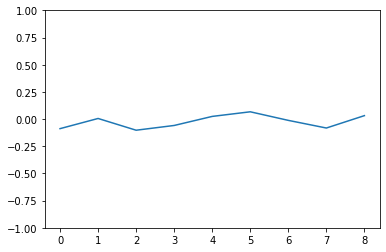

In [18]:
# check whether data is standardized or not
# mean should be 1.

plt.ylim(-1,1)

means = []
for i in range(X.shape[1]):
    means.append(np.mean(Xtest[:,i]))
plt.plot(means, scaley=False)

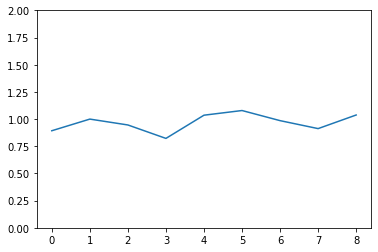

In [19]:
# Check variances

plt.ylim(0,2)

vars = []
for i in range(X.shape[1]):
    vars.append(np.var(Xtest[:,i]))
plt.plot(vars)

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV

model = LinearRegression()
# best number for min_features_to_select is half of the feature set (9 in this case)
rfecv = RFECV(model, step = 1, min_features_to_select = 4, n_jobs = -1)
rfecv.fit(Xtrain, Ytrain)

RFECV(estimator=LinearRegression(), min_features_to_select=4, n_jobs=-1)

In [21]:
rfecv.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

In [22]:
rfecv.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1])

In [23]:
selected_features = np.where(rfecv.support_)[0]
Xtrain = Xtrain[:, selected_features]
Xtest = Xtest[:, selected_features]

In [24]:
model.fit(Xtrain, Ytrain)

LinearRegression()

In [25]:
model.coef_

array([ 3.72364514e+03, -1.82971434e+02,  2.02378194e+03,  4.70371372e+02,
        9.90492297e+03,  8.15070049e+15,  8.23793120e+15,  8.60768626e+15,
        8.19474569e+15])

In [26]:
model.intercept_

13480.140282780694

In [27]:
model.coef_.dot(Xtest[10,:]) + model.intercept_

3798.140282780694

In [28]:
model.predict(Xtest[10,:].reshape(1, -1))

array([3798.14028278])

In [29]:
model.score(Xtest, Ytest)

0.6929821618293337